In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('day0_results_v1.csv', index_col=0)
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.style as mplstyle
from tqdm import tqdm
jet = plt.cm.jet
import datetime
# Invert the colormap
colors = [jet(x) for x in np.linspace(1, 0.5, 256)]
green_to_red = LinearSegmentedColormap.from_list('GreenToRed', colors, N=256)
colors = [jet(x) for x in np.linspace(0.5, 1, 256)]
red_to_green = LinearSegmentedColormap.from_list('GreenToRed', colors, N=256)

In [2]:
data.head()

,Anomaly,Lane,Milemarker,Time Index,Speed,Reconstructed Speed
0,0,1,53.3,1,0.925189,0.773148
1,0,2,53.3,1,0.865606,0.835754
2,0,3,53.3,1,0.833286,0.835754
3,0,4,53.3,1,0.842075,0.773148
4,0,1,53.6,1,0.903758,0.960142


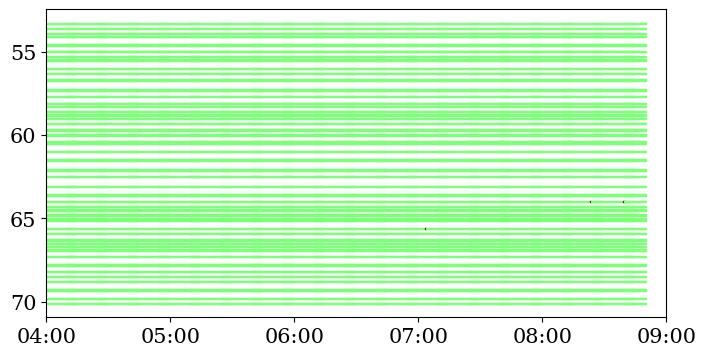

In [17]:
plt.figure(figsize=(8,4), facecolor='white')
plt.rc('font', family='serif', size=15)
lane = data[data.Lane == 4]
plt.scatter(30*lane['Time Index'].values , lane.Milemarker.values, 
                            c=lane.Anomaly.values,marker='s',cmap = red_to_green, s=1)
start_time = datetime.datetime.strptime("0:00", "%H:%M")
ticks = list(range(0, 3600*11+1, 3600))
xlabels = [(start_time + datetime.timedelta(seconds=tick)).strftime("%H:%M") for tick in ticks]
plt.xticks(ticks, labels=xlabels, rotation=0)
plt.xlim(3600*4,3600*9)
# plt.title('Lane 1')
plt.gca().invert_yaxis()

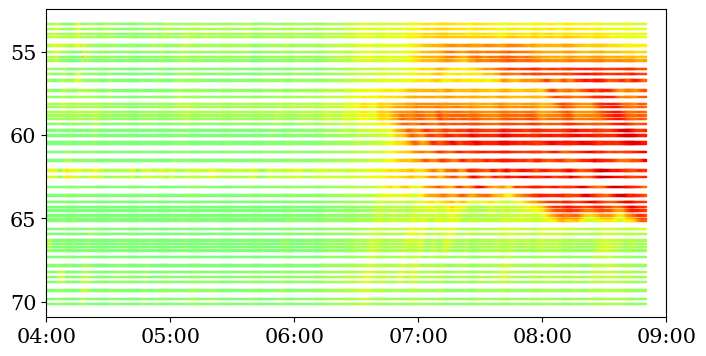

In [15]:
plt.figure(figsize=(8,4), facecolor='white')
plt.rc('font', family='serif', size=15)
lane = data[data.Lane == 1]
plt.scatter(30*lane['Time Index'].values , lane.Milemarker.values, 
                            c=lane['Speed'].values,marker='s',vmin=0,vmax=1,cmap = green_to_red, s=1)
start_time = datetime.datetime.strptime("0:00", "%H:%M")
ticks = list(range(0, 3600*11+1, 3600))
xlabels = [(start_time + datetime.timedelta(seconds=tick)).strftime("%H:%M") for tick in ticks]
plt.xticks(ticks, labels=xlabels, rotation=0)
plt.xlim(3600*4,3600*9)
plt.gca().invert_yaxis()

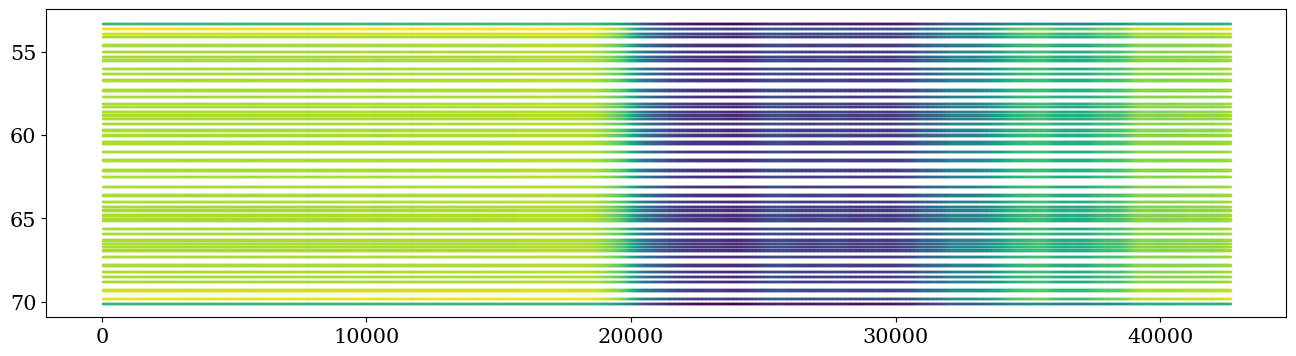

In [35]:
plt.figure(figsize=(16,4), facecolor='white')
plt.rc('font', family='serif', size=15)
lane = data[data.Lane == 2]
plt.scatter(30*lane['Time Index'].values , lane.Milemarker.values, 
                            c=lane['Reconstructed Speed'].values,marker='s',s=1)
plt.gca().invert_yaxis()